In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import (datasets, tree, model_selection, metrics)
cat = ['rec.autos', 'talk.religion.misc', 'comp.graphics', 'sci.space']
remove = ('headers', 'footers', 'quotes')


data_train = fetch_20newsgroups(subset = 'train',categories = cat, remove = remove)
data_test  = fetch_20newsgroups(subset = 'test',categories = cat, remove = remove)

train_Y = data_train.target
test_Y = data_test.target

vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')
train_X = vectorizer.fit_transform(data_train.data)
test_X  = vectorizer.fit_transform(data_test.data)

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(train_X,train_Y)
clf1 = MultinomialNB()
clf1.fit(train_X, train_Y) 
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(train_X, train_Y)
clf3 = RandomForestClassifier(max_depth=2, random_state=0)
clf3.fit(train_X, train_Y)
clf4 = AdaBoostClassifier(n_estimators=100, random_state=0)
clf4.fit(train_X, train_Y)


# print(test_X.shape)
# print(test_Y.shape)
# print(train_X.shape)
# print(train_Y.shape)
print(model_selection.cross_val_score(clf, test_X, test_Y, cv=5))
print(model_selection.cross_val_score(clf1, test_X, test_Y, cv=5))
print(model_selection.cross_val_score(clf2, test_X, test_Y, cv=5))
print(model_selection.cross_val_score(clf3, test_X, test_Y, cv=5))
print(model_selection.cross_val_score(clf4, test_X, test_Y, cv=5))
#print(len(data_train.data), len(data_test.data))
#print(data_train.target.shape, data_test.target.shape)

[0.86363636 0.90909091 0.88811189 0.88111888 0.86713287]
[0.8006993  0.87412587 0.84965035 0.86363636 0.82867133]
[0.27622378 0.31818182 0.31818182 0.3041958  0.32867133]
[0.62937063 0.63286713 0.6013986  0.62937063 0.65384615]
[0.63286713 0.67832168 0.69230769 0.66433566 0.65384615]


Classification report for classifier MLPClassifier(max_iter=300, random_state=1):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        88
           1       0.95      0.96      0.95        91
           2       0.97      0.97      0.97        86
           3       0.94      0.84      0.88        91
           4       0.97      0.91      0.94        92
           5       0.87      0.97      0.92        91
           6       0.95      0.99      0.97        91
           7       0.94      0.96      0.95        89
           8       0.86      0.88      0.87        88
           9       0.95      0.90      0.93        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899


Confusion matrix:
[[85  0  0  0  1  0  2  0  0  0]
 [ 0 87  0  2  0  1  0  1  0  0]
 [ 2  0 83  1  0  0  0  0  0  0]
 [ 0  0  2 76  0  4  0  1  8  0]
 [ 3  0 

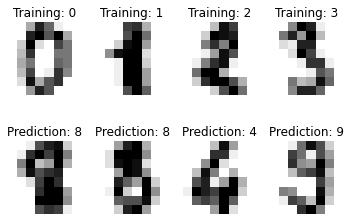

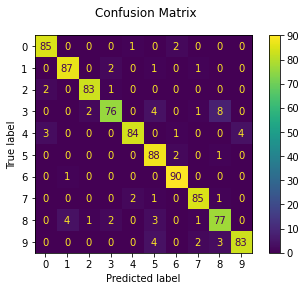

In [7]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

digits = datasets.load_digits()

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

classifier = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)

predicted = classifier.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

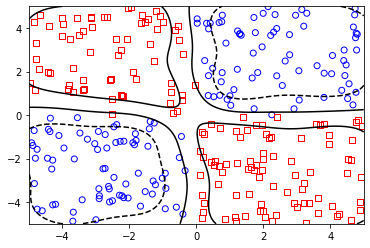

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


np.random.seed(0)
X=np.random.rand(300,2)*10-5
Y=np.logical_xor(X[:,0]>0,X[:,1]>0)

xx, yy = np.meshgrid(np.linspace(-5, 5, 300),
                     np.linspace(-5, 5, 300))


clf = svm.NuSVC(gamma= 'auto', degree=2)
clf.fit(X,Y)


Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

contours = plt.contour(xx, yy, Z, levels=3, linewidths=1.5, colors= 'k')
#plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[Y == 0, 0], X[Y == 0, 1], marker='o', edgecolors= 'b', facecolors='none')
plt.scatter(X[Y == 1, 0], X[Y == 1, 1], marker=',', edgecolors= 'r', facecolors='none')

plt.axis([-5, 5, -5, 5])
plt.show()